C:\Users\santi\AppData\Local\Temp\ipykernel_13536\803009070.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


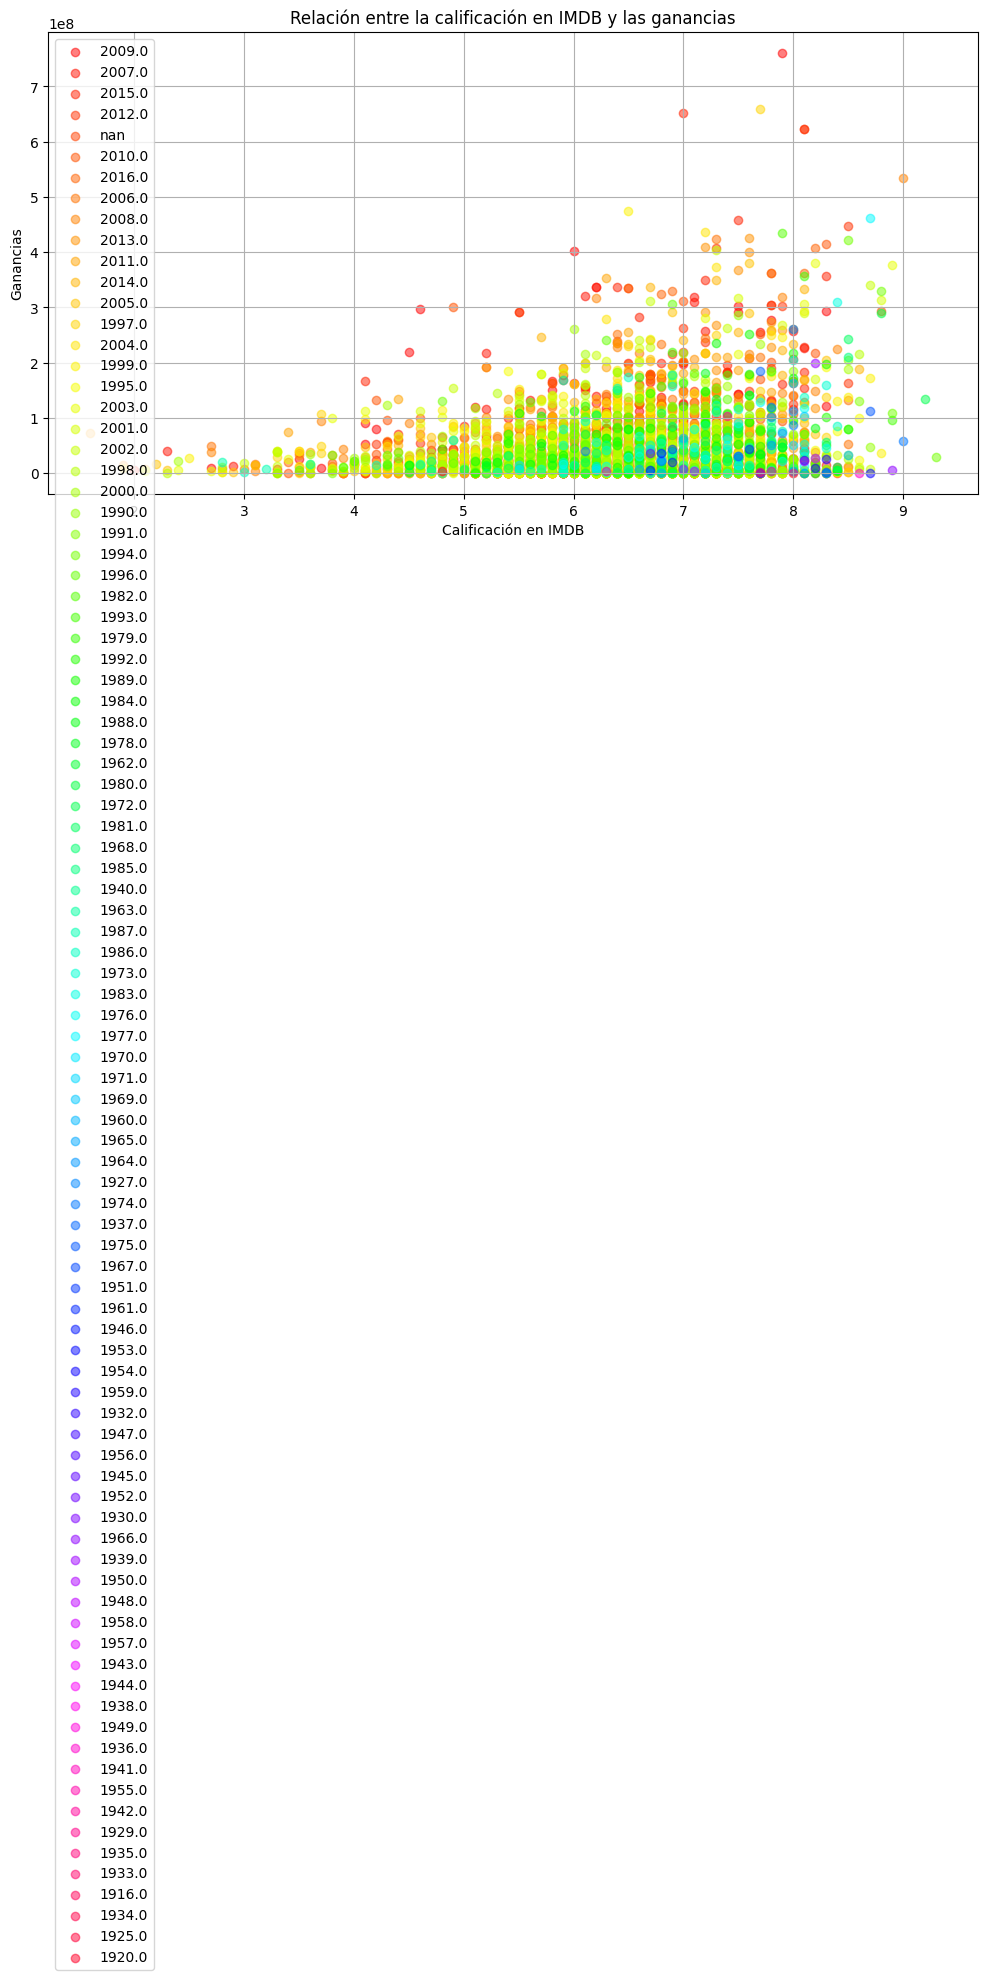

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('dataSet\MoviesDataSet.csv')

def get_color_map(n, name="hsv"):
    """Obtiene un mapa de colores en función del nombre y la cantidad de colores."""
    return plt.cm.get_cmap(name, n)

def plot_data_dispersion(x_label, y_label, dataframe):
    """
    Crea una gráfica de dispersión para visualizar la relación entre dos variables.

    Parameters:
    - x_label (str): Etiqueta del eje x.
    - y_label (str): Etiqueta del eje y.
    - dataframe (pd.DataFrame): DataFrame que contiene los datos.

    Returns:
    None
    """
    # Obtener años únicos en el DataFrame
    years = dataframe['title_year'].unique()

    # Obtener un mapa de colores en función de la cantidad de años
    cmap = get_color_map(len(years) + 1)

    # Configurar la figura para la gráfica de dispersión
    plt.figure(figsize=(12, 6))

    # Iterar sobre los años y agregar puntos a la gráfica de dispersión
    for i, year in enumerate(years):
        subset = dataframe[dataframe['title_year'] == year]
        plt.scatter(subset[x_label], subset[y_label], label=year, color=cmap(i), alpha=0.5)

    # Configurar leyenda, título y etiquetas de los ejes
    plt.legend()
    plt.title('Relación entre la calificación en IMDB y las ganancias')
    plt.xlabel('Calificación en IMDB')
    plt.ylabel('Ganancias')

    # Mostrar cuadrícula en la gráfica
    plt.grid(True)

    # Mostrar la gráfica de dispersión
    plt.show()

# Ejemplo de uso con las etiquetas 'imdb_score' y 'gross'
plot_data_dispersion('imdb_score', 'gross', data)


Los índices no coinciden. Ajustando...


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


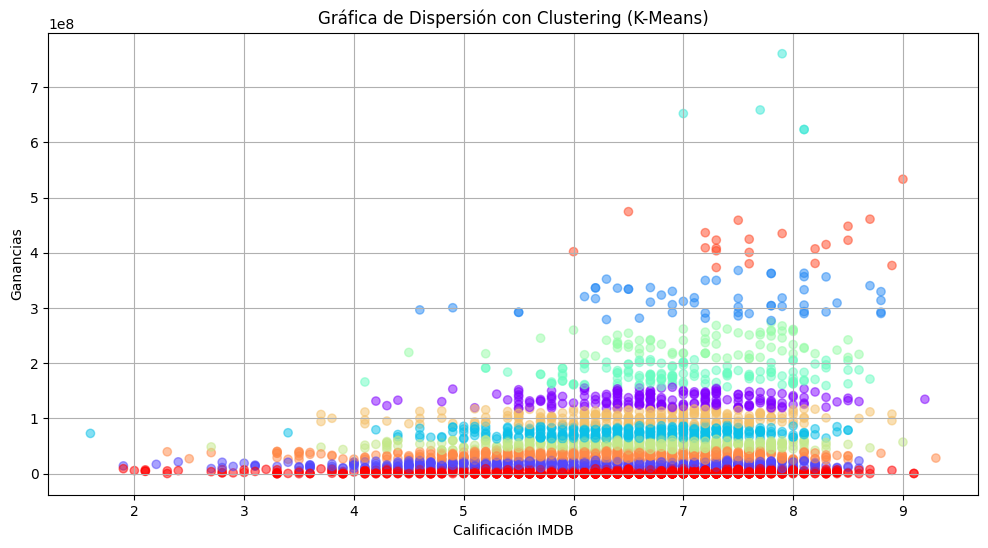

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar las columnas 'imdb_score' y 'gross' del DataFrame 'data'
X = data[['imdb_score', 'gross']]

# Eliminar las filas que contienen valores faltantes (NaN) en X
X = X.dropna()

# Verificar si hay discrepancias en los índices y ajustar si es necesario
if not data.index.equals(X.index):
    print("Los índices no coinciden. Ajustando...")
    data = data.loc[X.index]

# Crear una instancia del modelo K-Means con 12 clusters y semilla aleatoria 42
kmeans = KMeans(n_clusters=12, random_state=42)

# Aplicar el modelo a los datos
kmeans.fit(X)

# Añadir una columna 'Cluster' al DataFrame 'data' que contiene las etiquetas de cluster asignadas por K-Means
data['Cluster'] = kmeans.labels_

# Crear una gráfica de dispersión con los puntos coloreados por cluster
plt.figure(figsize=(12, 6))
plt.scatter(data['imdb_score'], data['gross'], c=data['Cluster'], cmap='rainbow', alpha=0.5)

# Configurar etiquetas y título
plt.title('Gráfica de Dispersión con Clustering (K-Means)')
plt.xlabel('Calificación IMDB')
plt.ylabel('Ganancias')

# Mostrar cuadrícula en la gráfica
plt.grid(True)

# Mostrar la gráfica de dispersión
plt.show()
